In [38]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

matplotlib.rc("figure", figsize=(8,6))
matplotlib.rc("axes", labelsize=16, titlesize=16)
matplotlib.rc("xtick", labelsize=14)
matplotlib.rc("ytick", labelsize=14)
matplotlib.rc("legend", fontsize=14)
matplotlib.rc("font", size=14)
matplotlib.rc("font", size=14)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

df1 = pd.read_excel('./DDS9_Data_Extract_with_labels.xlsx')
df2 = pd.read_excel('./DDS10_Data_Extract_with_labels.xlsx')
df3 = pd.read_excel('./DDS11_Data_Extract_with_labels.xlsx')

In [39]:
# df1.fillna(0, inplace=True)
# df2.fillna(0, inplace=True)
# df3.fillna(0, inplace=True)

In [40]:
BaseDemographic = ['Age Range', 'Employment Status', 'Ethnicity', 'Gender', 'Region', 'State', 'HouseholdIncome']

ChildDemographics = ['HasChildren', 'Children 10to13', 'Children 14to18', 'Children 19to25', 
                     'Children 26Up', 'Children 5to9', 'Children under 4']

FrequentApps = ['FrequentApp-Banking', 'FrequentApp-Books', 'FrequentApp-Browser', 
                'FrequentApp-Business', 'FrequentApp-Dating', 'FrequentApp-Education', 
                'FrequentApp-Food', 'FrequentApp-Games', 'FrequentApp-Health', 
                'FrequentApp-Hobbies', 'FrequentApp-Language', 'FrequentApp-Location', 
                'FrequentApp-Magazines', 'FrequentApp-Messaging', 'FrequentApp-Movie', 
                'FrequentApp-Music', 'FrequentApp-Navigation', 'FrequentApp-News', 
                'FrequentApp-Newspaper', 'FrequentApp-None', 'FrequentApp-Photo', 
                'FrequentApp-Productivity', 'FrequentApp-QRReader', 'FrequentApp-Reservations', 
                'FrequentApp-Retail', 'FrequentApp-Reviews', 'FrequentApp-SocialMedia', 
                'FrequentApp-Sports', 'FrequentApp-Tickets', 'FrequentApp-Transport', 
                'FrequentApp-Travel', 'FrequentApp-Unknown', 'FrequentApp-Utilities', 
                'FrequentApp-VOIP', 'FrequentApp-VideoStreaming', 'FrequentApp-Weather']

HasItems = ['HasFlatPanelTelevision', 'HasBluRay', 'HasDVR', 'HasGamingConsole', 'HasOverAirDigitalTV', 'HasPortableStreaming', 'HasStreamingBox',
            'HasBasicPhone', 'HasSmartPhone', 'HasTablet']

PurchaseItems = ['Purchase3DPrinter', 'PurchaseBasicPhone', 'PurchaseBluRay', 'PurchaseDVR', 
                 'PurchaseDesktop', 'PurchaseDrone', 'PurchaseEReader', 'PurchaseFitnessBand', 
                 'PurchaseFlatPanelTelevision', 'PurchaseGamingConsole', 'PurchaseLaptop', 'PurchaseLaptopHybrid', 
                 'PurchaseLargeSmartphone', 'PurchaseLargeTablet', 'PurchaseNoDevices', 'PurchaseNone', 
                 'PurchaseOverAirDigitalTV', 'PurchasePortableGamingConsole', 'PurchaseSmallSmartphone', 'PurchaseSmallTablet', 
                 'PurchaseSmartGlasses', 'PurchaseSmartPhone', 'PurchaseSmartWatch', 'PurchaseStreamingBox', 
                 'PurchaseTablet', 'PurchaseThumbdrive', 'PurchaseUnknown', 
                 'PurchaseVRHeadset', 'PurchaseWirelessRouter']

valueItems = ['Value3DPrinter', 'ValueBasicPhone', 'ValueBlueRay', 'ValueDVR', 'ValueDesktop', 
              'ValueDrone', 'ValueEReader', 'ValueFitnessBand', 'ValueFlatPanelTelevision', 'ValueGamingConsole', 
              'ValueLaptop', 'ValueLaptopHybrid', 'ValueLargeSmartphone', 'ValueLargeTablet', 'ValueNetworkRouter', 
              'ValueOverAirTV', 'ValuePlaceHolder', 'ValuePlaceholder', 'ValuePortableGamingConsole', 'ValueSmallSmartphone', 
              'ValueSmallTablet', 'ValueSmartGlasses', 'ValueSmartPhone', 'ValueSmartWatch', 'ValueStreamingBox', 
              'ValueTablet', 'ValueThumbDrive', 'ValueVRHeadset']

TimeWatching = ['TimeWatchingMoviesPC', 'TimeWatchingMoviesSmartphone', 'TimeWatchingMoviesTV', 'TimeWatchingMoviesTablet',
                'TimeWatchingSportsPC', 'TimeWatchingSportsSmartphone', 'TimeWatchingSportsTV', 'TimeWatchingSportsTablet', 
                'TimeWatchingTvPC', 'TimeWatchingTvSmartphone', 'TimeWatchingTvTV', 'TimeWatchingTvTablet']



In [41]:
# replace all yes and nos
YesNoQuestions = [ChildDemographics, FrequentApps, HasItems,PurchaseItems]
flattenedYesNo = [val for sublist in YesNoQuestions for val in sublist]

for i in flattenedYesNo:
    if i in df1.columns:
        df1[i].replace(('Yes', 'No'), (1, 0), inplace=True)
    if i in df2.columns:
        df2[i].replace(('Yes', 'No'), (1, 0), inplace=True)
    if i in df3.columns:
        df3[i].replace(('Yes', 'No'), (1, 0), inplace=True)
    
    

# Correlating Item Ownership

In [217]:
# purchaseItems2 = np.intersect1d(PurchaseItems, df2.columns)
# purchaseItemMap2 = df2[purchaseItems2]
# purchaseItemMap2.dropna(how='any')
# corr = purchaseItemMap2.corr()
# plt.clf()
# sns.heatmap(corr)
# plt.show()

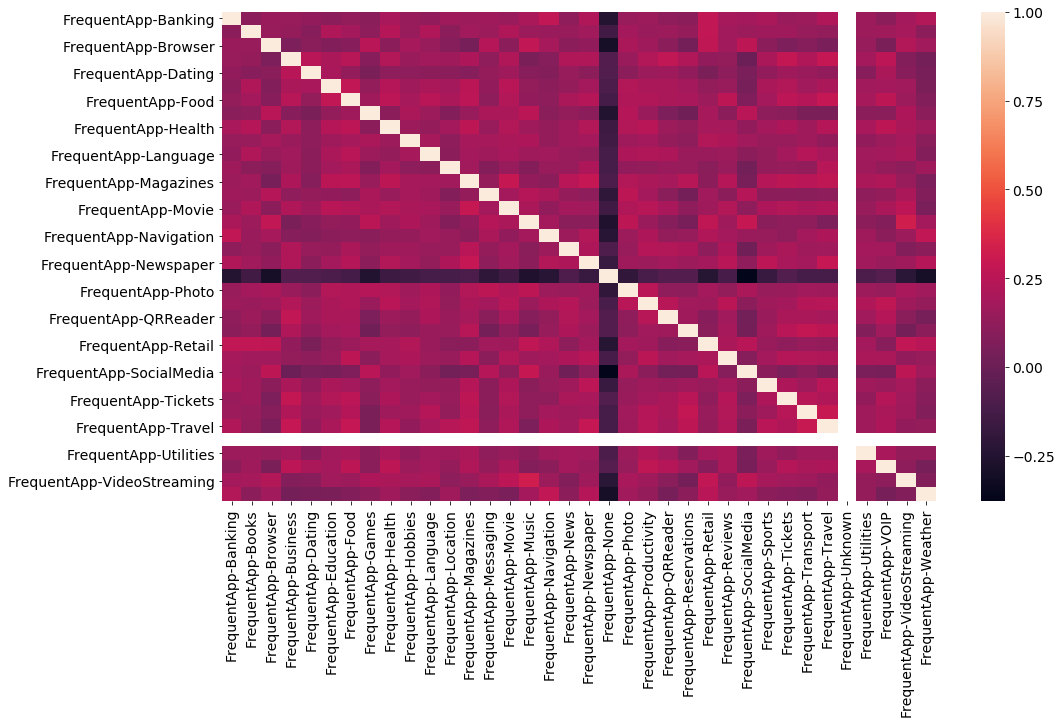

In [212]:
# somewhat interesting. there are subtle bands in the graph, which indicates if you use one type of app youre more likely
# to use certain other types (magazines), and the opposite is true in some cases (Social Media)

frequentApps1 = np.intersect1d(FrequentApps, df1.columns)
frequentApps2 = np.intersect1d(FrequentApps, df2.columns)
frequentApps3 = np.intersect1d(FrequentApps, df3.columns)

FrApps1 = df1[frequentApps1]
FrApps2 = df2[frequentApps2]
FrApps3 = df3[frequentApps3]

FrApps1.dropna(how='any')
FrApps2.dropna(how='any')
FrApps3.dropna(how='any')

# corr = FrApps1.corr()
# plt.clf()
# sns.heatmap(corr)
# plt.show()

# corr = FrApps2.corr()
# plt.clf()
# sns.heatmap(corr)
# plt.show()

corr = FrApps3.corr()
plt.clf()
sns.heatmap(corr)
plt.show()

In [45]:
def Group_Age (row, ranges):
    if(row['Age'] <= ranges[0]):
        return 'Gen Z'
    if(row['Age'] > ranges[0] and row['Age'] <= ranges[1]):
        return 'Millenial'
    if(row['Age'] > ranges[1] and row['Age'] <= ranges[2]):
        return 'Gen X'
    if(row['Age'] > ranges[2] and row['Age'] <= ranges[3]):
        return 'Baby Boomer'
    if(row['Age'] > ranges[3]):
        return 'Mature'

df1['Age Group'] = df1.apply(lambda row: Group_Age(row, [13.0, 26.0, 43.0, 62.0]), axis=1)
df2['Age Group'] = df2.apply(lambda row: Group_Age(row, [14.0, 27.0, 44.0, 63.0]), axis=1)
df3['Age Group'] = df3.apply(lambda row: Group_Age(row, [15.0, 28.0, 45.0, 64.0]), axis=1)

In [46]:
maxSample = 2000

HasItems = ['HasFlatPanelTelevision', 'HasBluRay', 'HasDVR', 'HasGamingConsole', 'HasOverAirDigitalTV', 'HasPortableStreaming', 'HasStreamingBox',
            'HasBasicPhone', 'HasSmartPhone', 'HasTablet']


hasItems1 = np.intersect1d(HasItems, df1.columns)
hasItems2 = np.intersect1d(HasItems, df2.columns)
hasItems3 = np.intersect1d(HasItems, df3.columns)

In [47]:
AgeGroups = ['Gen Z', 'Millenial', 'Gen X', 'Baby Boomer', 'Mature']

hasItems_2009 = df1[0:maxSample].groupby('Age Group')[hasItems1].mean()
hasItems_2010 = df2[0:maxSample].groupby('Age Group')[hasItems2].mean()
hasItems_2011 = df3[0:maxSample].groupby('Age Group')[hasItems3].mean()


print(hasItems_2011)

             HasBasicPhone  HasBluRay    HasDVR  HasFlatPanelTelevision  \
Age Group                                                                 
Baby Boomer       0.218069   0.523364  0.308411                0.685358   
Gen X             0.172084   0.548757  0.359465                0.512428   
Gen Z             0.122449   0.693878  0.387755                0.673469   
Mature            0.418605   0.357782  0.323792                0.771020   
Millenial         0.133212   0.452555  0.237226                0.394161   

             HasGamingConsole  HasOverAirDigitalTV  HasPortableStreaming  \
Age Group                                                                  
Baby Boomer          0.367601             0.149533              0.152648   
Gen X                0.602294             0.231358              0.235182   
Gen Z                0.795918             0.204082              0.244898   
Mature               0.103757             0.105546              0.055456   
Millenial         

             HasBasicPhone  HasBluRay    HasDVR  HasFlatPanelTelevision  \
Age Group                                                                 
Baby Boomer       0.218069   0.523364  0.308411                0.685358   
Gen X             0.172084   0.548757  0.359465                0.512428   
Gen Z             0.122449   0.693878  0.387755                0.673469   
Mature            0.418605   0.357782  0.323792                0.771020   
Millenial         0.133212   0.452555  0.237226                0.394161   

             HasGamingConsole  HasOverAirDigitalTV  HasPortableStreaming  \
Age Group                                                                  
Baby Boomer          0.367601             0.149533              0.152648   
Gen X                0.602294             0.231358              0.235182   
Gen Z                0.795918             0.204082              0.244898   
Mature               0.103757             0.105546              0.055456   
Millenial         

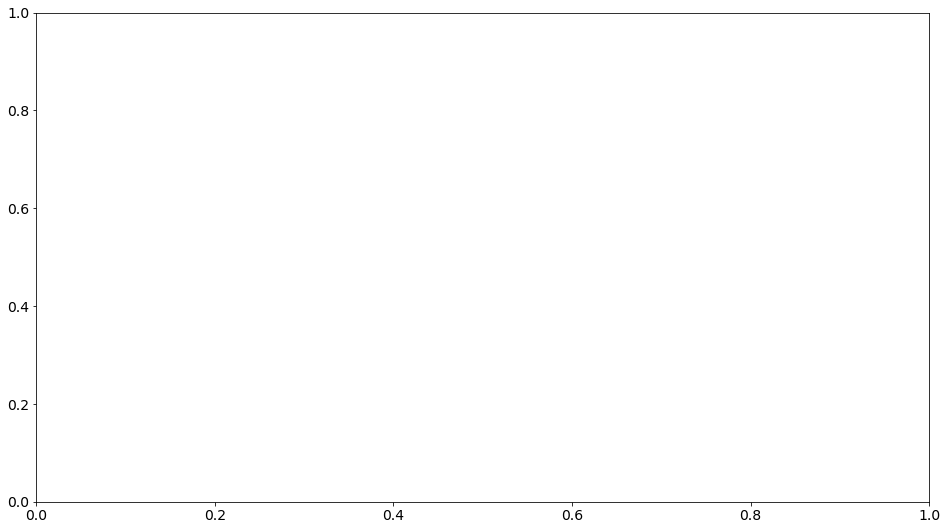

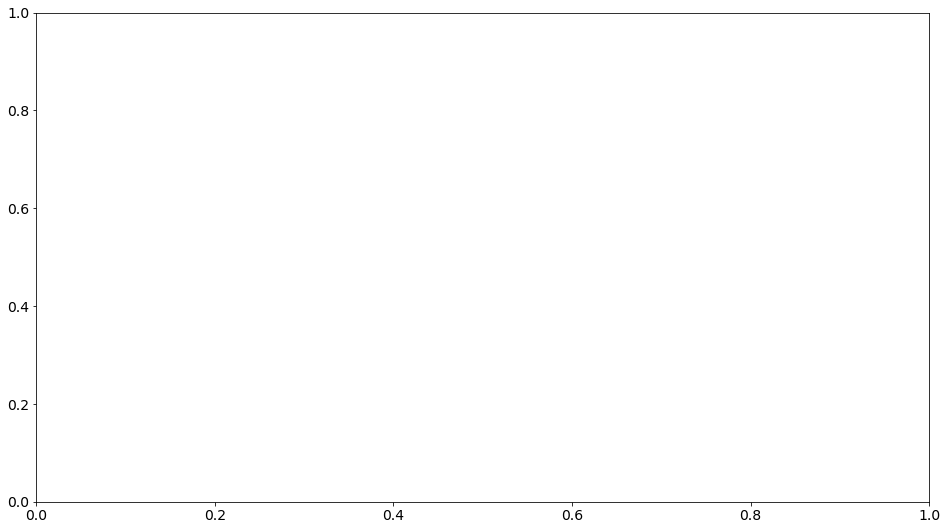

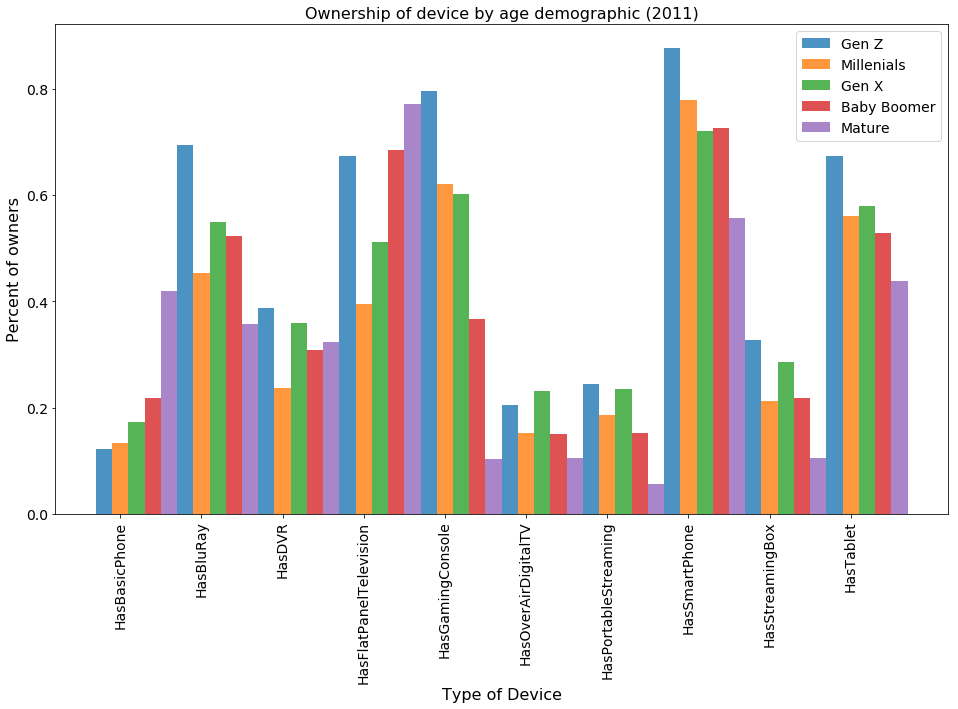

In [48]:
fig, ax = plt.subplots()
bar_width = 0.2
opacity = 0.8

# rects1 = plt.bar(index+ bar_width, hasItems_2009.iloc[3].apply(lambda x: x * 100 / totalRep1.iloc[0][1]), bar_width,
#                  alpha=opacity, label='Millenials')

# rects2 = plt.bar(index+ (2*bar_width), hasItems_2009.iloc[1].apply(lambda x: x * 100 / totalRep1.iloc[1][1]), bar_width,
#                  alpha=opacity, label='Gen X')

# rects3 = plt.bar(index+ (3*bar_width), hasItems_2009.iloc[0].apply(lambda x: x * 100 / totalRep1.iloc[2][1]), bar_width,
#                  alpha=opacity, label='Baby Boomer')

# rects3 = plt.bar(index+ (4*bar_width), hasItems_2009.iloc[2].apply(lambda x: x * 100 / totalRep1.iloc[3][1]), bar_width,
#                  alpha=opacity, label='Mature')

# plt.ylabel('Percent of owners')
# plt.xlabel('Type of Device')
# plt.title('% ownership of device by age demographic (2009)')
# plt.xticks(index + (bar_width)*2, hasItems_2009.keys(), rotation = 90)
# plt.legend()

# plt.show()

# index = np.arange(len(hasItems2)) 


# rects1 = plt.bar(index+ bar_width, hasItems_2011.iloc[2].apply(lambda x: x * 100 / totalRep3.iloc[4][1]), bar_width,
#                  alpha=opacity, label='Gen Z')

# rects2 = plt.bar(index+ bar_width, hasItems_2010.iloc[4].apply(lambda x: x * 100 / totalRep2.iloc[0][1]), bar_width,
#                  alpha=opacity, label='Millenials')

# rects3 = plt.bar(index+ (2*bar_width), hasItems_2010.iloc[1].apply(lambda x: x * 100 / totalRep2.iloc[1][1]), bar_width,
#                  alpha=opacity, label='Gen X')

# rects4 = plt.bar(index+ (3*bar_width), hasItems_2010.iloc[0].apply(lambda x: x * 100 / totalRep2.iloc[2][1]), bar_width,
#                  alpha=opacity, label='Baby Boomer')

# rects5 = plt.bar(index+ (4*bar_width), hasItems_2010.iloc[3].apply(lambda x: x * 100 / totalRep2.iloc[3][1]), bar_width,
#                  alpha=opacity, label='Mature')

# plt.ylabel('Percent of owners')
# plt.xlabel('Type of Device')
# plt.title('Ownership of device by age demographic (2010)')
# plt.xticks(index + (bar_width), hasItems_2010.keys(), rotation = 90)
# plt.legend()

# plt.show()

print(hasItems_2011)

index = np.arange(len(hasItems3))

rects1 = plt.bar(index + bar_width, hasItems_2011.iloc[2], bar_width, alpha=opacity, label='Gen Z')

rects2 = plt.bar(index+ (2*bar_width), hasItems_2011.iloc[4], bar_width, alpha=opacity, label='Millenials')

rects3 = plt.bar(index+ (3*bar_width), hasItems_2011.iloc[1], bar_width, alpha=opacity, label='Gen X')

rects4 = plt.bar(index+ (4*bar_width), hasItems_2011.iloc[0], bar_width, alpha=opacity, label='Baby Boomer')

rects5 = plt.bar(index+ (5*bar_width), hasItems_2011.iloc[3], bar_width, alpha=opacity, label='Mature')

plt.ylabel('Percent of owners')
plt.xlabel('Type of Device')
plt.title('Ownership of device by age demographic (2011)')
plt.xticks(index + (bar_width*2), hasItems_2011.keys(), rotation = 90)
plt.legend()

plt.show()

In [348]:
# Ownership by gender (nothing very interesting here)
hasItems_2009 = df1[0:maxSample].groupby('Gender')[hasItems1].mean()
hasItems_2010 = df2[0:maxSample].groupby('Gender')[hasItems2].mean()
hasItems_2011 = df3[0:maxSample].groupby('Gender')[hasItems3].mean()

# fig, ax = plt.subplots()
# index = np.arange(len(hasItems1))
# bar_width = 0.2
# opacity = 0.8

# rects1 = plt.bar(index+ bar_width, hasItems_2009.iloc[0], bar_width, alpha=opacity, label='Female')

# rects2 = plt.bar(index+ (2*bar_width), hasItems_2009.iloc[1], bar_width, alpha=opacity, label='Male')

# plt.ylabel('Percent of owners')
# plt.xlabel('Type of Device')
# plt.title('Gender Ownership of Devices (2009)')
# plt.xticks(index + (bar_width)*2, hasItems_2009.keys(), rotation = 90)
# plt.legend()

# plt.show()

In [49]:
# close in on more narrow categories of devices

HasPhoneOrTablet = ['HasBasicPhone', 'HasLargeSmartphone', 'HasLargeTablet', 'HasSmallSmartphone', 
           'HasSmallTablet', 'HasSmartPhone', 'HasTablet']

HasHomeMedia = ['HasBluRay', 'HasDVR', 'HasFlatPanelTelevision', 'HasOverAirDigitalTV', 'HasPortableStreaming']

PurchasePhoneOrTablet = ['PurchaseBasicPhone', 'PurchaseLargeSmartphone', 'PurchaseLargeTablet', 
                         'PurchaseSmallSmartPhone','PurchaseSmallTablet', 'PurchaseSmartPhone', 'PurchaseTablet']

PurchaseHomeMedia = ['PurchaseBluRay', 'PurchaseDVR', 'PurchaseFlatPanelTelevision', 'PurchaseOverAirDigitalTV',
                     'PurchaseStreamingBox']



hasPhoneOrTablet1 = np.intersect1d(HasPhoneOrTablet, df1.columns)
hasPhoneOrTablet2 = np.intersect1d(HasPhoneOrTablet, df2.columns)
hasPhoneOrTablet3 = np.intersect1d(HasPhoneOrTablet, df3.columns)

purchasePhoneOrTablet1 = np.intersect1d(PurchasePhoneOrTablet, df1.columns)
purchasePhoneOrTablet2 = np.intersect1d(PurchasePhoneOrTablet, df2.columns)
purchasePhoneOrTablet3 = np.intersect1d(PurchasePhoneOrTablet, df3.columns)

hasHomeMedia1 = np.intersect1d(HasHomeMedia, df1.columns)
hasHomeMedia2 = np.intersect1d(HasHomeMedia, df2.columns)
hasHomeMedia3 = np.intersect1d(HasHomeMedia, df3.columns)

purchaseHomeMedia1 = np.intersect1d(PurchaseHomeMedia , df1.columns)
purchaseHomeMedia2 = np.intersect1d(PurchaseHomeMedia , df2.columns)
purchaseHomeMedia3 = np.intersect1d(PurchaseHomeMedia , df3.columns)

                      HasBasicPhone  HasSmartPhone  HasTablet
HouseholdIncome                                              
$100,000 to $299,999       0.191429       0.751429   0.648571
$30,000 to $49,999         0.215881       0.717122   0.498759
$50,000 to $99,999         0.245640       0.704942   0.582849
Do not know                0.212963       0.731481   0.509259
Less than $29,999          0.280374       0.605140   0.378505
More than $300,000         0.304348       0.695652   0.521739


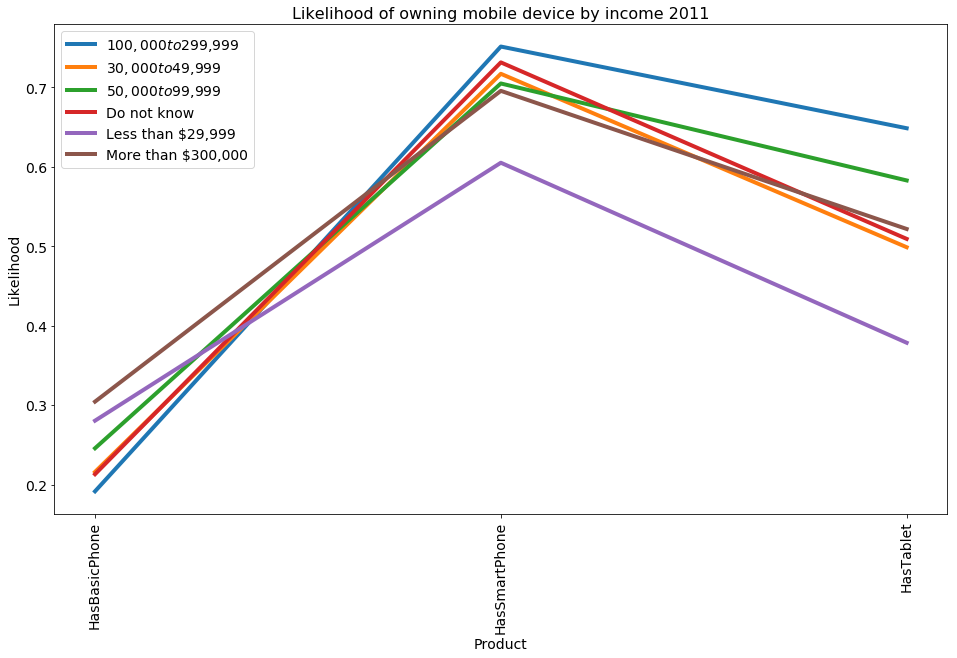

In [50]:
# group mobile devices owned by Household Income. The takeaway is that theres a convergence of smartphone adoption, but 
# people of lower income are not adopting as quickly

pd.Categorical(df1['HouseholdIncome'])        
hasItems_2009 = df1[0:maxSample].groupby('HouseholdIncome')[hasPhoneOrTablet1].mean()
hasItems_2010 = df2[0:maxSample].groupby('HouseholdIncome')[hasPhoneOrTablet2].mean()
hasItems_2011 = df3[0:maxSample].groupby('HouseholdIncome')[hasPhoneOrTablet3].mean()

IncomeBins = np.unique(df1['HouseholdIncome'])

# for ind in np.arange(len(IncomeBins)):
#     plt.plot(list(hasItems_2009), hasItems_2009.iloc[ind], label=IncomeBins[ind], linewidth=4)
    
# plt.title('Likelihood of owning mobile device by income 2009')
# plt.xlabel('Product', fontsize=14)
# plt.ylabel('Likelihood', fontsize=14)
# plt.xticks(hasItems_2009.keys(), rotation = 90)
# plt.legend()
# plt.show()

# for ind in np.arange(len(IncomeBins)):
#     plt.plot(list(hasItems_2010), hasItems_2010.iloc[ind], label=IncomeBins[ind], linewidth=4)
    
# plt.title('Likelihood of owning mobile device by income 2010')
# plt.xlabel('Product', fontsize=14)
# plt.ylabel('Likelihood', fontsize=14)
# plt.xticks(hasItems_2010.keys(), rotation = 90)
# plt.legend()
# plt.show()

print(hasItems_2011)

for ind in np.arange(len(IncomeBins)):
    plt.plot(list(hasItems_2011), hasItems_2011.iloc[ind], label=IncomeBins[ind], linewidth=4)
    
plt.title('Likelihood of owning mobile device by income 2011')
plt.xlabel('Product', fontsize=14)
plt.ylabel('Likelihood', fontsize=14)
plt.xticks(hasItems_2011.keys(), rotation = 90)
plt.legend()
plt.show()



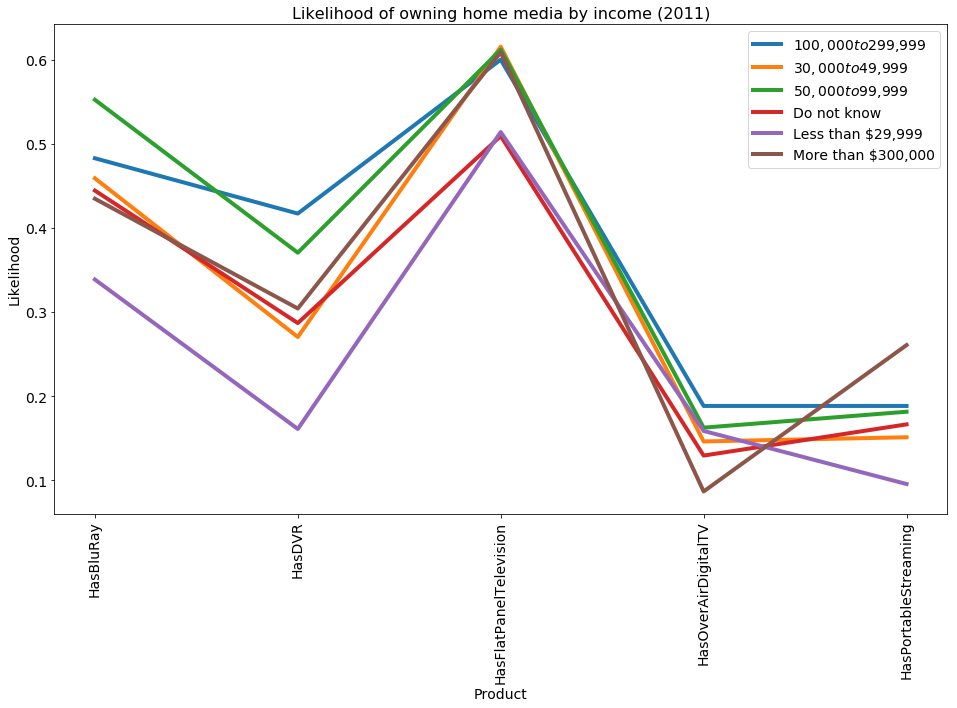

In [309]:
# group home media items owned by Household Income. Theres not a significant growth trend between 2009-2011
# The market is somewhat static, and likehood of having DVR or BluRay varies widely by income in 2011
hasItems_2009 = df1[0:maxSample].groupby('HouseholdIncome')[hasHomeMedia1].mean()
hasItems_2010 = df2[0:maxSample].groupby('HouseholdIncome')[hasHomeMedia2].mean()
hasItems_2011 = df3[0:maxSample].groupby('HouseholdIncome')[hasHomeMedia3].mean()

IncomeBins = np.unique(df1['HouseholdIncome'])

# for ind in np.arange(len(IncomeBins)):
#     plt.plot(list(hasItems_2009), hasItems_2009.iloc[ind], label=IncomeBins[ind], linewidth=4)
    
# plt.title('Likelihood of owning home media by income (2009)')
# plt.xlabel('Product', fontsize=14)
# plt.ylabel('Likelihood', fontsize=14)
# plt.xticks(hasItems_2009.keys(), rotation = 90)
# plt.legend()
# plt.show()

# for ind in np.arange(len(IncomeBins)):
#     plt.plot(list(hasItems_2010), hasItems_2010.iloc[ind], label=IncomeBins[ind], linewidth=4)
    
# plt.title('Likelihood of owning home media by income (2010)')
# plt.xlabel('Product', fontsize=14)
# plt.ylabel('Likelihood', fontsize=14)
# plt.xticks(hasItems_2010.keys(), rotation = 90)
# plt.legend()
# plt.show()

for ind in np.arange(len(IncomeBins)):
    plt.plot(list(hasItems_2011), hasItems_2011.iloc[ind], label=IncomeBins[ind], linewidth=4)
    
plt.title('Likelihood of owning home media by income (2011)')
plt.xlabel('Product', fontsize=14)
plt.ylabel('Likelihood', fontsize=14)
plt.xticks(hasItems_2011.keys(), rotation = 90)
plt.legend()
plt.show()

In [272]:
# group items owned by ethnicity (nothing particularly interesting here)
# EthnicityHasItems = []
# pd.Categorical(df1['Ethnicity'])        
# hasItems_2009 = df1[0:maxSample].groupby('Ethnicity')[hasItems1].mean()
# hasItems_2010 = df2[0:maxSample].groupby('Ethnicity')[hasItems2].mean()
# hasItems_2011 = df3[0:maxSample].groupby('Ethnicity')[hasItems3].mean()

# groups = df1.groupby('label')
# uniqueEthnicities = list(np.unique(df1['Ethnicity']))
# races = np.arange(len(np.unique(df1['Ethnicity'])))

# for ind in races:
#     plt.plot(list(hasItems_2009), hasItems_2009.iloc[ind], label=uniqueEthnicities[ind])
    
# plt.title('Likelihood of owning item by ethnicity')
# plt.xlabel('Product', fontsize=14)
# plt.ylabel('Likelihood', fontsize=14)
# plt.xticks(hasItems_2009.keys(), rotation = 90)
# plt.legend()
# plt.show()

# for ind in races:
#     plt.plot(list(hasItems_2010), hasItems_2010.iloc[ind], label=uniqueEthnicities[ind])
    
# plt.title('Likelihood of owning item by ethnicity')
# plt.xlabel('Product', fontsize=14)
# plt.ylabel('Likelihood', fontsize=14)
# plt.xticks(hasItems_2010.keys(), rotation = 90)
# plt.legend()
# plt.show()

# for ind in races:
#     plt.plot(list(hasItems_2010), hasItems_2010.iloc[ind], label=uniqueEthnicities[ind])
    
# plt.title('Likelihood of owning item by ethnicity')
# plt.xlabel('Product', fontsize=14)
# plt.ylabel('Likelihood', fontsize=14)
# plt.xticks(hasItems_2011.keys(), rotation = 90)
# plt.legend()
# plt.show()

In [287]:
# # likehood of having a mobile device by Household Income. Uniform ownership
# purchaseItems_2011 = df3[0:maxSample].groupby('Region')[hasPhoneOrTablet3].mean()


# RegionBins = np.unique(df3['Region'])

# for ind in np.arange(len(RegionBins)):
#     plt.plot(list(purchaseItems_2011), purchaseItems_2011.iloc[ind], label=RegionBins[ind], linewidth=4)
    
# plt.title('Likelihood of owning mobile device by region')
# plt.xlabel('Product', fontsize=14)
# plt.ylabel('Likelihood', fontsize=14)
# plt.xticks(purchaseItems_2011.keys(), rotation = 90)
# plt.legend()
# plt.show()

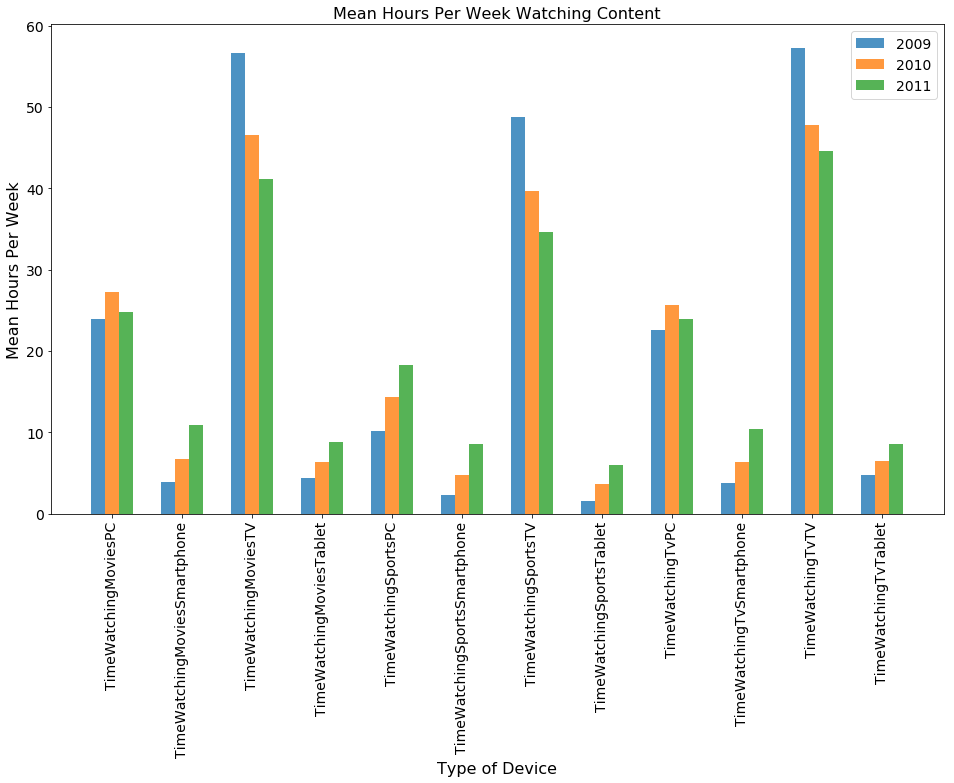

TimeWatchingMoviesPC            23.896435
TimeWatchingMoviesSmartphone     3.935453
TimeWatchingMoviesTV            56.699422
TimeWatchingMoviesTablet         4.445568
TimeWatchingSportsPC            10.161368
TimeWatchingSportsSmartphone     2.320328
TimeWatchingSportsTV            48.791426
TimeWatchingSportsTablet         1.603565
TimeWatchingTvPC                22.587669
TimeWatchingTvSmartphone         3.745183
TimeWatchingTvTV                57.296243
TimeWatchingTvTablet             4.696532
dtype: float64
TimeWatchingMoviesPC            27.241270
TimeWatchingMoviesSmartphone     6.687075
TimeWatchingMoviesTV            46.618594
TimeWatchingMoviesTablet         6.411791
TimeWatchingSportsPC            14.375964
TimeWatchingSportsSmartphone     4.773243
TimeWatchingSportsTV            39.721542
TimeWatchingSportsTablet         3.609070
TimeWatchingTvPC                25.684807
TimeWatchingTvSmartphone         6.396372
TimeWatchingTvTV                47.853061
TimeWatchingTvTable

In [51]:
timeWatching_2009 = df1[TimeWatching].mean()
timeWatching_2010 = df2[TimeWatching].mean()
timeWatching_2011 = df3[TimeWatching].mean()

fig, ax = plt.subplots()
index = np.arange(len(TimeWatching))
bar_width = 0.2
opacity = 0.8

rects3 = plt.bar(index+ bar_width, timeWatching_2009, bar_width,
                 alpha=opacity, label='2009')

rects4 = plt.bar(index+ (2*bar_width), timeWatching_2010, bar_width,
                 alpha=opacity, label='2010')

rects5 = plt.bar(index+ (3*bar_width), timeWatching_2011, bar_width,
                 alpha=opacity, label='2011')

plt.ylabel('Mean Hours Per Week')
plt.xlabel('Type of Device')
plt.title('Mean Hours Per Week Watching Content')
plt.xticks(index + (2*bar_width), timeWatching_2009.keys(), rotation = 90)
plt.legend()

plt.show()


print(timeWatching_2009)
print(timeWatching_2010)
print(timeWatching_2011)

In [220]:
# avg time watching on devices by gender. No notable relationship

# GenderTV_2011 = df3[0:maxSample].groupby('Gender')[TimeWatching].mean()

# GenderBins = np.unique(df1['Gender'])

# for ind in np.arange(len(GenderBins)):
#     plt.plot(list(GenderTV_2011), GenderTV_2011.iloc[ind], label=GenderBins[ind], linewidth=4)
    
# plt.title('Mean time spent watching on different devices by gender (2011)')
# plt.xlabel('By Product', fontsize=14)
# plt.ylabel('Mean Hours Per Week', fontsize=14)
# plt.xticks(GenderTV_2011.keys(), rotation = 90)
# plt.legend()
# plt.show()

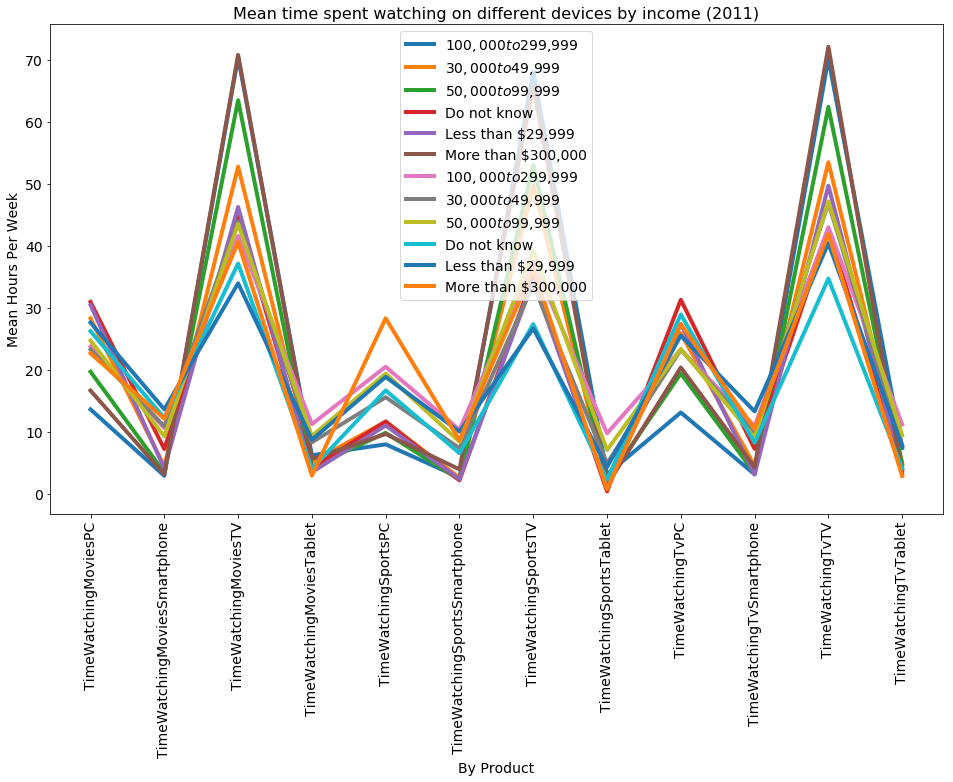

In [342]:
incomeTV_2009 = df1[0:maxSample].groupby('HouseholdIncome')[TimeWatching].mean()
incomeTV_2010 = df2[0:maxSample].groupby('HouseholdIncome')[TimeWatching].mean()
incomeTV_2011 = df3[0:maxSample].groupby('HouseholdIncome')[TimeWatching].mean()

IncomeBins = np.unique(df1['HouseholdIncome'])

for ind in np.arange(len(IncomeBins)):
    plt.plot(list(incomeTV_2009), incomeTV_2009.iloc[ind], label=IncomeBins[ind], linewidth=4)
    
# plt.title('Mean time spent watching on different devices by income (2009)')
# plt.xlabel('By Product', fontsize=14)
# plt.ylabel('Mean Hours Per Week', fontsize=14)
# plt.xticks(incomeTV_2009.keys(), rotation = 90)
# plt.legend()
# plt.show()

# for ind in np.arange(len(IncomeBins)):
#     plt.plot(list(incomeTV_2010), incomeTV_2010.iloc[ind], label=IncomeBins[ind], linewidth=4)
    
# plt.title('Mean time spent watching on different devices by income (2010)')
# plt.xlabel('By Product', fontsize=14)
# plt.ylabel('Mean Hours Per Week', fontsize=14)
# plt.xticks(incomeTV_2010.keys(), rotation = 90)
# plt.legend()
# plt.show()

for ind in np.arange(len(IncomeBins)):
    plt.plot(list(incomeTV_2011), incomeTV_2011.iloc[ind], label=IncomeBins[ind], linewidth=4)
    
plt.title('Mean time spent watching on different devices by income (2011)')
plt.xlabel('By Product', fontsize=14)
plt.ylabel('Mean Hours Per Week', fontsize=14)
plt.xticks(incomeTV_2011.keys(), rotation = 90)
plt.legend()
plt.show()


In [237]:
# narrowing down to valuations related to mobile devices and media watching devices
ValuePhoneOrTablet = ['ValueBasicPhone', 'ValueLargeSmartphone', 'ValueLargeTablet', 'ValueSmallSmartPhone','ValueSmallTablet', 'ValueSmartPhone', 'ValueTablet']

ValueHomeMedia = ['ValueeBluRay', 'ValueDVR', 'ValueFlatPanelTelevision', 'ValueOverAirTV',
                     'ValueStreamingBox']



valuePhoneOrTablet1 = np.intersect1d(ValuePhoneOrTablet, df1.columns)
valuePhoneOrTablet2 = np.intersect1d(ValuePhoneOrTablet, df2.columns)
valuePhoneOrTablet3 = np.intersect1d(ValuePhoneOrTablet, df3.columns)

valueHomeMedia1 = np.intersect1d(ValueHomeMedia, df1.columns)
valueHomeMedia2 = np.intersect1d(ValueHomeMedia, df2.columns)
valueHomeMedia3 = np.intersect1d(ValueHomeMedia, df3.columns)

In [231]:
# valuation of devices by income. mildly interesting.
# incomeMobileDevices_2009 = df1[0:maxSample].groupby('HouseholdIncome')[valuePhoneOrTablet1].mean()
# incomeMobileDevices_2010 = df2[0:maxSample].groupby('HouseholdIncome')[valuePhoneOrTablet2].mean()
# incomeMobileDevices_2011 = df3[0:maxSample].groupby('HouseholdIncome')[valuePhoneOrTablet3].mean()

# IncomeBins = np.unique(df1['HouseholdIncome'])

# for ind in np.arange(len(IncomeBins)):
#     plt.plot(list(incomeMobileDevices_2010), incomeMobileDevices_2010.iloc[ind], label=IncomeBins[ind], linewidth=4)
    
# plt.title('Value of Different Mobile Devices by Income (2010)')
# plt.xlabel('Mobile Device', fontsize=14)
# plt.ylabel('Average Valuation', fontsize=14)
# plt.xticks(incomeMobileDevices_2010.keys(), rotation = 90)
# plt.legend()
# plt.show()

# for ind in np.arange(len(IncomeBins)):
#     plt.plot(list(incomeMobileDevices_2011), incomeMobileDevices_2011.iloc[ind], label=IncomeBins[ind], linewidth=4)
    
# plt.title('Value of Different Mobile Devices by Income (2011)')
# plt.xlabel('Mobile Device', fontsize=14)
# plt.ylabel('Average Valuation', fontsize=14)
# plt.xticks(incomeMobileDevices_2011.keys(), rotation = 90)
# plt.legend()
# plt.show()

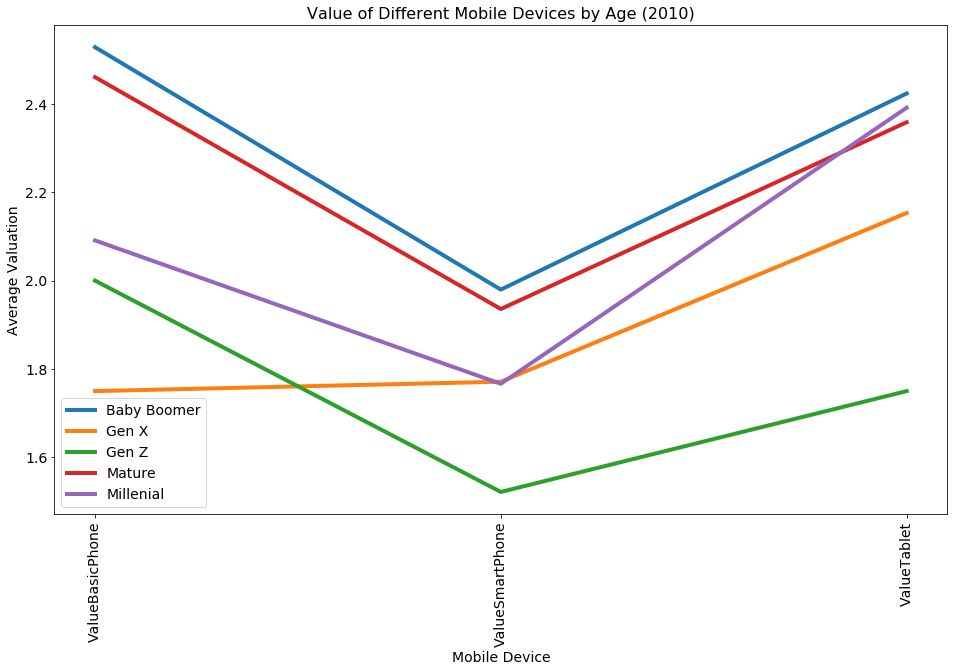

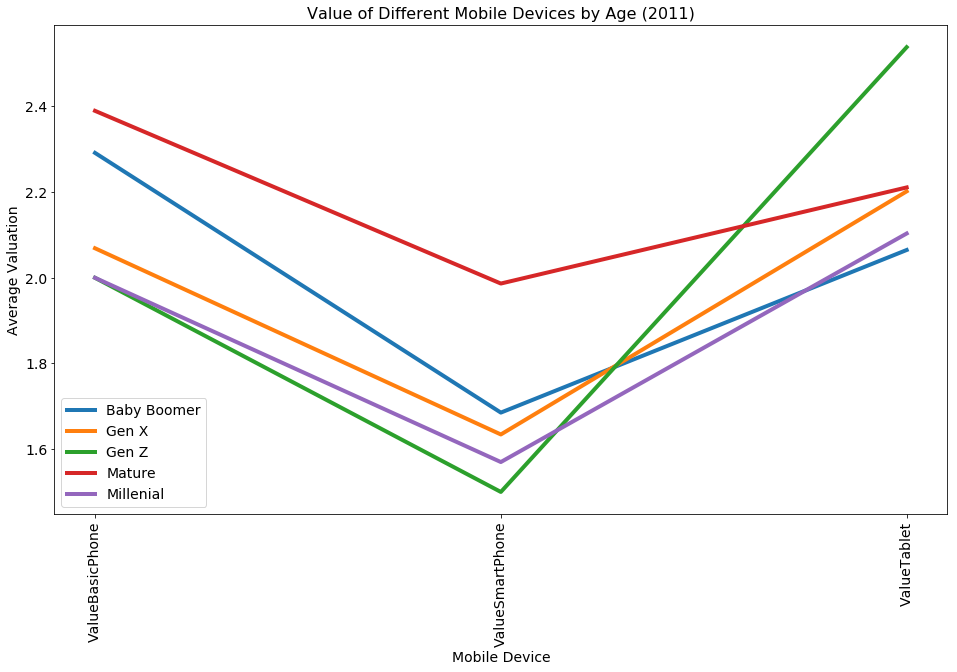

In [341]:
# The smart phone market starts to stabilize among age groups. Mature people are late adopters. Each age groups starts to
# converge on a mild valuation of tablets, if you ignore the Gen Z outlier
ageMobileDevices_2009 = df1[0:maxSample].groupby('Age Group')[valuePhoneOrTablet1].mean()
ageMobileDevices_2010 = df2[0:maxSample].groupby('Age Group')[valuePhoneOrTablet2].mean()
ageMobileDevices_2011 = df3[0:maxSample].groupby('Age Group')[valuePhoneOrTablet3].mean()

AgeBins = np.unique(df2['Age Group'])

for ind in np.arange(len(AgeBins)):
    plt.plot(list(ageMobileDevices_2010), ageMobileDevices_2010.iloc[ind], label=AgeBins[ind], linewidth=4)
    
plt.title('Value of Different Mobile Devices by Age (2010)')
plt.xlabel('Mobile Device', fontsize=14)
plt.ylabel('Average Valuation', fontsize=14)
plt.xticks(ageMobileDevices_2010.keys(), rotation = 90)
plt.legend()
plt.show()

for ind in np.arange(len(AgeBins)):
    plt.plot(list(ageMobileDevices_2011), ageMobileDevices_2011.iloc[ind], label=AgeBins[ind], linewidth=4)
    
plt.title('Value of Different Mobile Devices by Age (2011)')
plt.xlabel('Mobile Device', fontsize=14)
plt.ylabel('Average Valuation', fontsize=14)
plt.xticks(ageMobileDevices_2011.keys(), rotation = 90)
plt.legend()
plt.show()

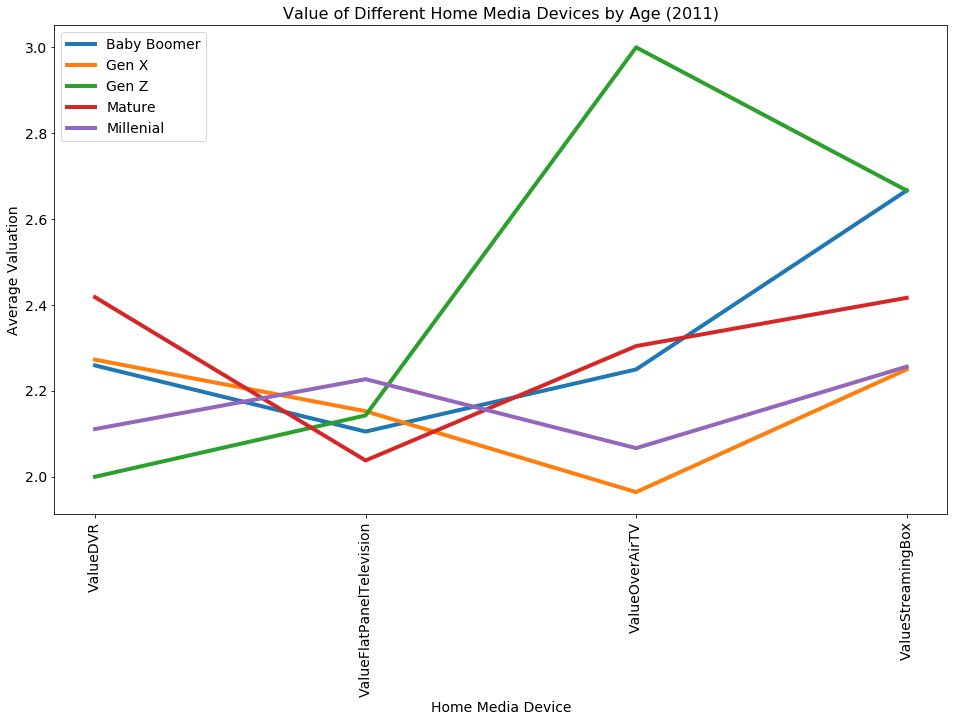

In [263]:
# This one is a little surprising. Gen X values TV even less than Millenials
ageHomeMedia_2011 = df3[0:maxSample].groupby('Age Group')[valueHomeMedia3].mean()

AgeBins = np.unique(df3['Age Group'])

for ind in np.arange(len(AgeBins)):
    plt.plot(list(ageHomeMedia_2011), ageHomeMedia_2011.iloc[ind], label=AgeBins[ind], linewidth=4)
    
plt.title('Value of Different Home Media Devices by Age (2011)')
plt.xlabel('Home Media Device', fontsize=14)
plt.ylabel('Average Valuation', fontsize=14)
plt.xticks(ageHomeMedia_2011.keys(), rotation = 90)
plt.legend()
plt.show()

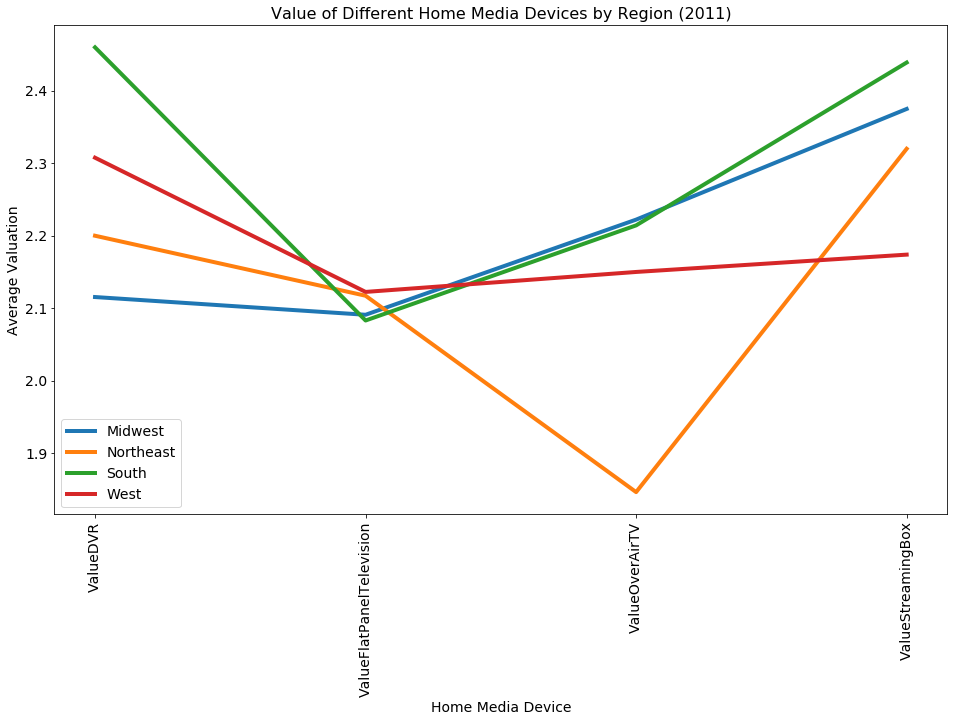

In [271]:
# Certainly a trend in what home media devices people value by region (no regional trend in device valuation)
regionHomeMedia_2011 = df3[0:maxSample].groupby('Region')[valueHomeMedia3].mean()

RegionBins = np.unique(df3['Region'])

for ind in np.arange(len(RegionBins)):
    plt.plot(list(regionHomeMedia_2011), regionHomeMedia_2011.iloc[ind], label=RegionBins[ind], linewidth=4)
    
plt.title('Value of Different Home Media Devices by Region (2011)')
plt.xlabel('Home Media Device', fontsize=14)
plt.ylabel('Average Valuation', fontsize=14)
plt.xticks(regionHomeMedia_2011.keys(), rotation = 90)
plt.legend()
plt.show()

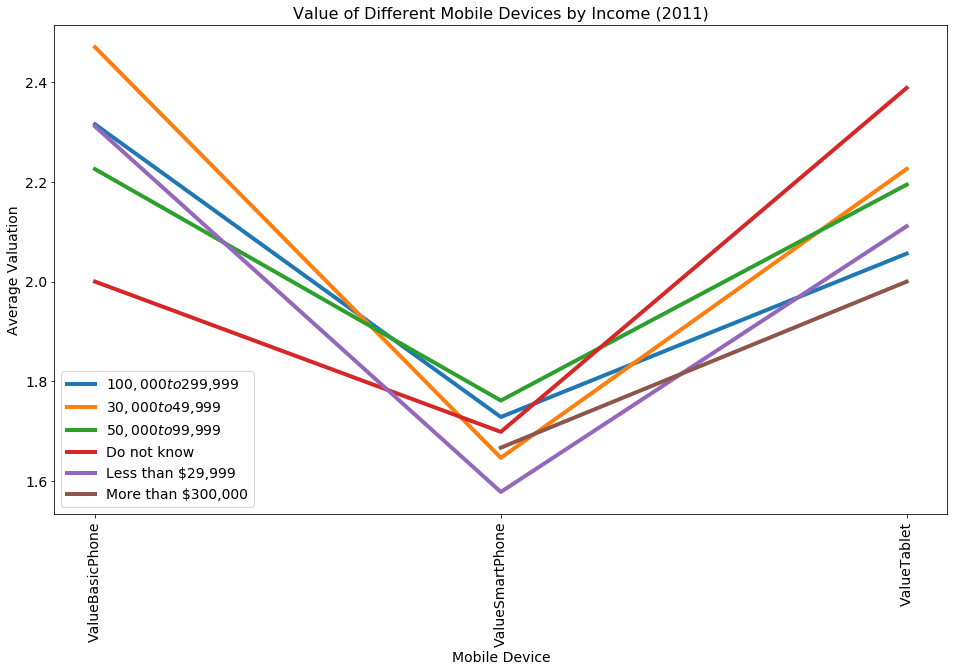

In [337]:
# Definitely a big trend in what mobile devices people value based on income
incomeMobileDevices_2011 = df3[0:maxSample].groupby('HouseholdIncome')[valuePhoneOrTablet3].mean()

IncomeBins = np.unique(df3['HouseholdIncome'])

for ind in np.arange(len(IncomeBins)):
    plt.plot(list(incomeMobileDevices_2011), incomeMobileDevices_2011.iloc[ind], label=IncomeBins[ind], linewidth=4)
    
plt.title('Value of Different Mobile Devices by Income (2011)')
plt.xlabel('Mobile Device', fontsize=14)
plt.ylabel('Average Valuation', fontsize=14)
plt.xticks(incomeMobileDevices_2011.keys(), rotation = 90)
plt.legend()
plt.show()

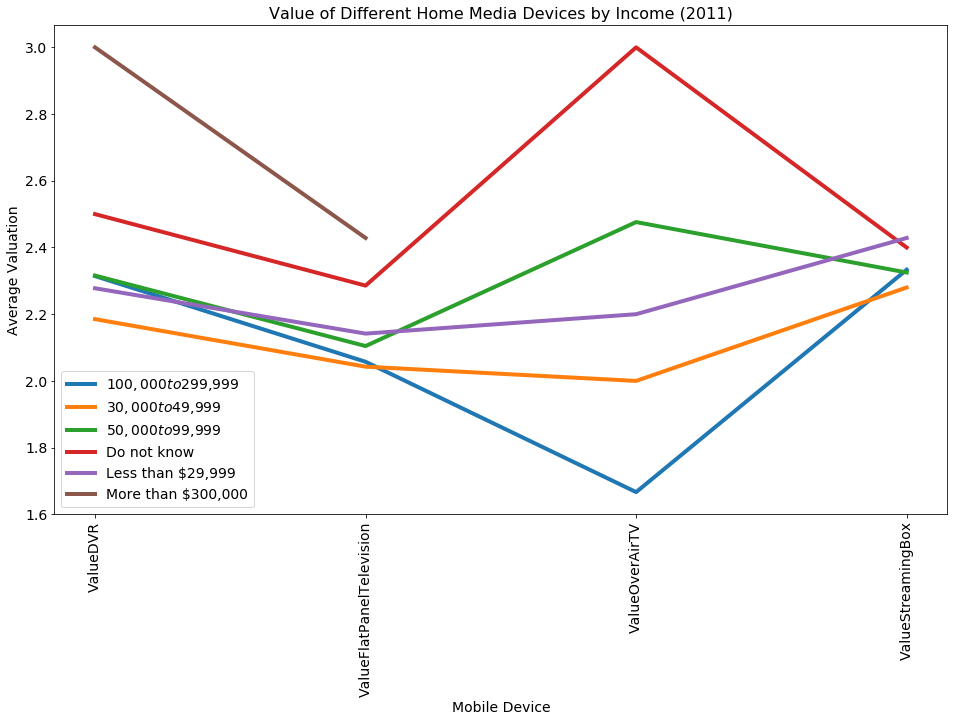

In [339]:
# what home devices people value based on income. Convergence on flat panel TVs and Streaming Boxes, Major Divergence on over air tv
incomeHomeDevices_2011 = df3[0:maxSample].groupby('HouseholdIncome')[valueHomeMedia3].mean()

IncomeBins = np.unique(df3['HouseholdIncome'])

for ind in np.arange(len(IncomeBins)):
    plt.plot(list(incomeHomeDevices_2011), incomeHomeDevices_2011.iloc[ind], label=IncomeBins[ind], linewidth=4)
    
plt.title('Value of Different Home Media Devices by Income (2011)')
plt.xlabel('Mobile Device', fontsize=14)
plt.ylabel('Average Valuation', fontsize=14)
plt.xticks(incomeHomeDevices_2011.keys(), rotation = 90)
plt.legend()
plt.show()

In [53]:
# narrowing down frequent apps for more useful correlations
NarrowFrequentApps = ['FrequentApp-Games','FrequentApp-Messaging','FrequentApp-Movie', 
                'FrequentApp-Music','FrequentApp-News','FrequentApp-Newspaper', 
                'FrequentApp-Retail','FrequentApp-SocialMedia','FrequentApp-Sports',
                'FrequentApp-VideoStreaming']

NarrowApps = np.intersect1d(NarrowFrequentApps, df3.columns)

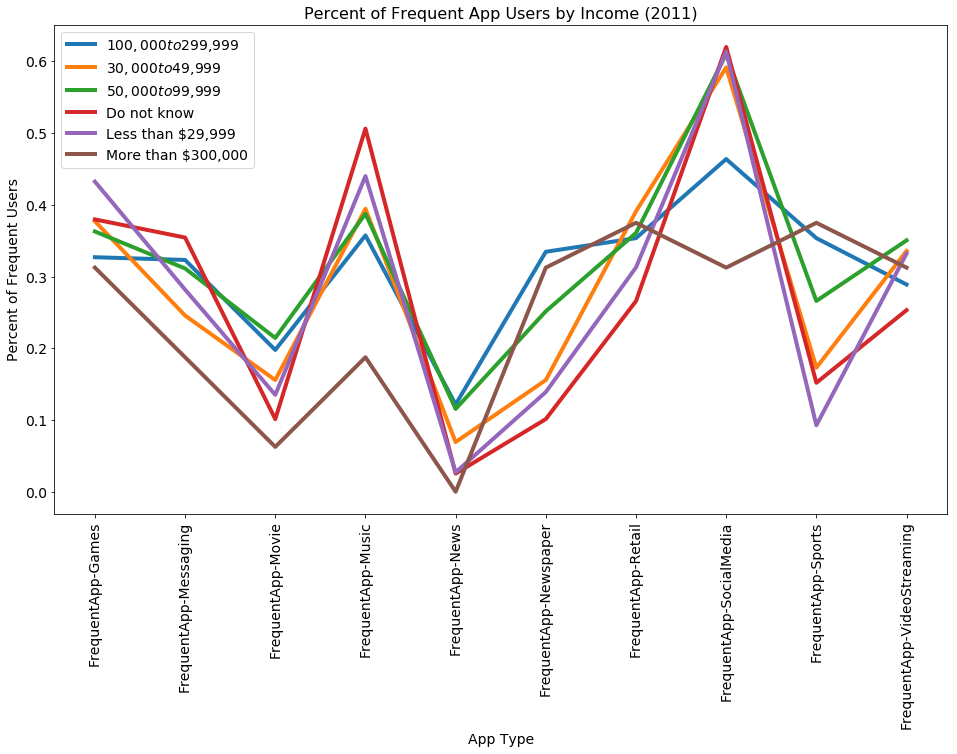

In [54]:
# Interesting Trend in which apps people use frequently based on income. Some are more accessible by 
# people of all income than others
incomeAppUsage_2011 = df3[0:maxSample].groupby('HouseholdIncome')[NarrowApps].mean()

IncomeBins = np.unique(df3['HouseholdIncome'])

for ind in np.arange(len(IncomeBins)):
    plt.plot(list(incomeAppUsage_2011), incomeAppUsage_2011.iloc[ind], label=IncomeBins[ind], linewidth=4)
    
plt.title('Percent of Frequent App Users by Income (2011)')
plt.xlabel('App Type', fontsize=14)
plt.ylabel('Percent of Frequent Users', fontsize=14)
plt.xticks(incomeAppUsage_2011.keys(), rotation = 90)
plt.legend()
plt.show()

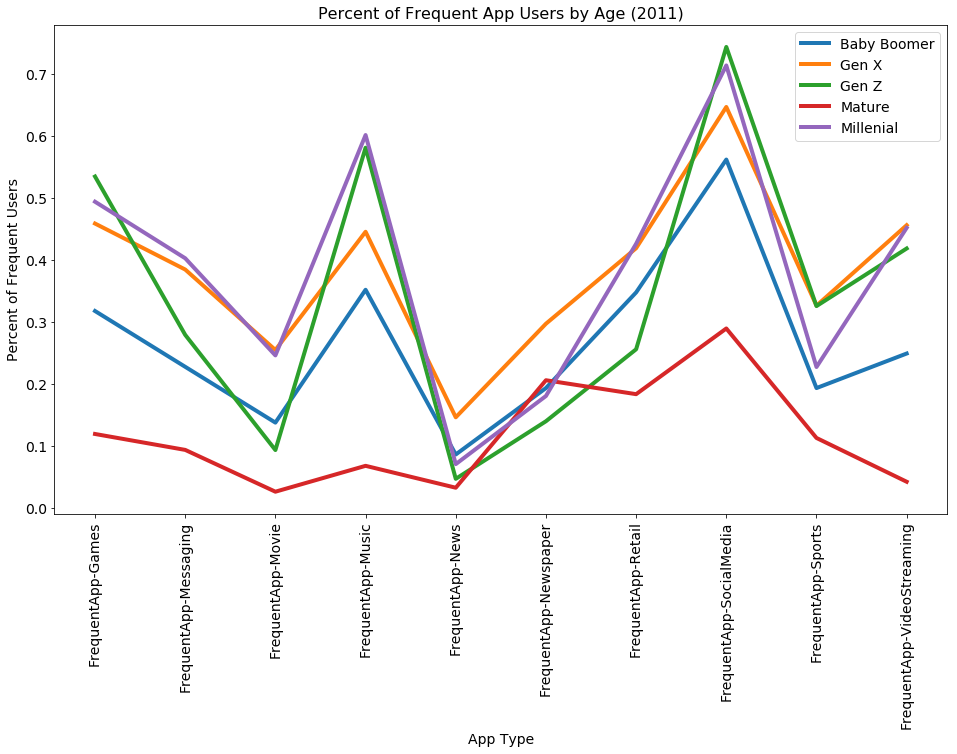

In [304]:
# Interesting Trend in which apps people use frequently based on age. Big disparities in which apps people use.
ageAppUsage_2011 = df3[0:maxSample].groupby('Age Group')[NarrowApps].mean()

AgesBins = np.unique(df3['Age Group'])

for ind in np.arange(len(AgesBins)):
    plt.plot(list(ageAppUsage_2011), ageAppUsage_2011.iloc[ind], label=AgesBins[ind], linewidth=4)
    
plt.title('Percent of Frequent App Users by Age (2011)')
plt.xlabel('App Type', fontsize=14)
plt.ylabel('Percent of Frequent Users', fontsize=14)
plt.xticks(ageAppUsage_2011.keys(), rotation = 90)
plt.legend()
plt.show()

In [55]:
# percent change in ownership of devices and intent to purchase between 2010 and 2011 (alarmingly static market)
hasMobileDevices_2010 = df2[0:maxSample][hasPhoneOrTablet2].mean()
hasMobileDevices_2011 = df3[0:maxSample][hasPhoneOrTablet3].mean()

purchaseMobileDevices_2010 = df2[0:maxSample][purchasePhoneOrTablet2].mean()
purchaseMobileDevices_2011 = df3[0:maxSample][purchasePhoneOrTablet3].mean()

diff1 = hasMobileDevices_2011 - hasMobileDevices_2010
diff2 = purchaseMobileDevices_2011 - purchaseMobileDevices_2010


print('% change in mobile device ownership')
print(diff1)
print('% change in mobile device purchase intent')
print(diff2)

% change in mobile device ownership
HasBasicPhone   -0.0245
HasSmartPhone   -0.0165
HasTablet        0.0110
dtype: float64
% change in mobile device purchase intent
PurchaseBasicPhone    0.0090
PurchaseSmartPhone   -0.0075
PurchaseTablet       -0.0220
dtype: float64


In [332]:
# average percent change in app usage
# averageAppUsage_2010 = df2[0:maxSample][NarrowApps].mean()
# averageAppUsage_2011 = df3[0:maxSample][NarrowApps].mean()

# diff1 = (averageAppUsage_2011 - averageAppUsage_2010) * 100
 
# fig, ax = plt.subplots()
# index = np.arange(len(NarrowApps))
# bar_width = 1
# opacity = 0.8
 
# rects = plt.bar(index, diff1, bar_width, alpha=opacity)
 
# plt.ylabel('Percentage change')
# plt.title('Percent change in app usage between 2010 and 2011')
# plt.xticks(index, diff1.keys(), rotation=90)
# plt.legend()
 

# plt.show()

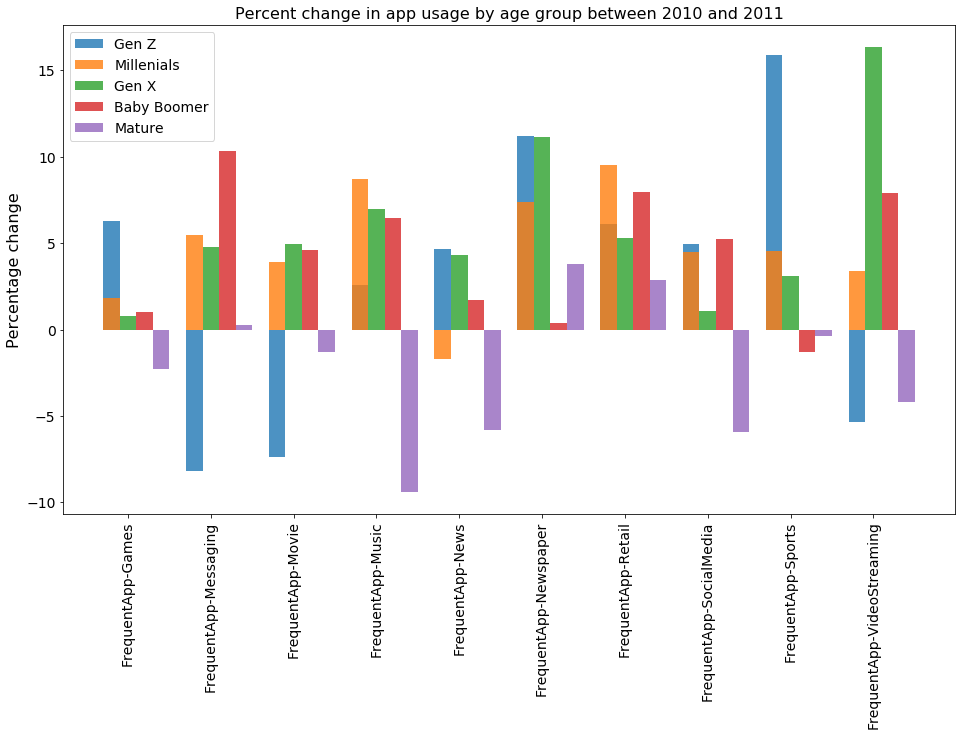

             FrequentApp-Games  FrequentApp-Messaging  FrequentApp-Movie  \
Age Group                                                                  
Baby Boomer           1.040702              10.328480           4.583579   
Gen X                 0.766643               4.803002           4.976386   
Gen Z                 6.266150              -8.204134          -7.364341   
Mature               -2.296442               0.292501          -1.298620   
Millenial             1.832315               5.464783           3.893839   

             FrequentApp-Music  FrequentApp-News  FrequentApp-Newspaper  \
Age Group                                                                 
Baby Boomer           6.434963          1.720946               0.359056   
Gen X                 7.001359          4.344957              11.171637   
Gen Z                 2.583979          4.651163              11.175711   
Mature               -9.376621         -5.816824               3.804585   
Millenial        

In [56]:
# percent change in ownership of devices and intent to purchase between 2010 and 2011 (alarmingly static market)
averageAppUsage_2010 = df2[0:maxSample].groupby('Age Group')[NarrowApps].mean()
averageAppUsage_2011 = df3[0:maxSample].groupby('Age Group')[NarrowApps].mean()

diff1 = (averageAppUsage_2011 - averageAppUsage_2010) * 100

fig, ax = plt.subplots()
index = np.arange(len(NarrowApps))
bar_width = 0.2
opacity = 0.8
 
rects1 = plt.bar(index+ bar_width, diff1.iloc[2], bar_width,
                 alpha=opacity, label='Gen Z')

rects2 = plt.bar(index+ bar_width, diff1.iloc[4], bar_width,
                 alpha=opacity, label='Millenials')

rects3 = plt.bar(index+ (2*bar_width), diff1.iloc[1], bar_width,
                 alpha=opacity, label='Gen X')

rects4 = plt.bar(index+ (3*bar_width), diff1.iloc[0], bar_width,
                 alpha=opacity, label='Baby Boomer')

rects5 = plt.bar(index+ (4*bar_width), diff1.iloc[3], bar_width,
                 alpha=opacity, label='Mature')

plt.ylabel('Percentage change')
plt.title('Percent change in app usage by age group between 2010 and 2011')
plt.xticks(index + (bar_width * 2), diff1.keys(), rotation=90)
plt.legend()

plt.show()

print(diff1)